In [134]:
int_map = {
    '.': 0, # floor
    '#': 1, # wall
    'O': 2, # movable box
    '@': 3 # robot
}

int_map_inv = {v: k for k, v in int_map.items()}

move_map = {
    '^': (-1, 0),
    'v': (1, 0),
    '<': (0, -1),
    '>': (0, 1)
}
move_map_inv = {v: k for k, v in move_map.items()}

In [135]:
import numpy as np
import matplotlib.pyplot as plt

class Robot():
    def __init__(self, init_p: tuple[int, int], move_set: list[tuple[int, int]]):
        self.p = init_p
        self.move_set = move_set
        self.move_set_idx = 0

    def get_next_move(self):
        if self.move_set_idx >= len(self.move_set):
            return None
        return self.move_set[self.move_set_idx]
    
    def get_next_move_str(self):
        next_move = self.get_next_move()
        if next_move is None:
            return ''
        return move_map_inv[next_move]

    def __repr__(self):
        return f'(p={self.p}, [next_moves={self.move_set[self.move_set_idx:self.move_set_idx+5]}])'
    
class Floor():
    def __init__(self, floor: np.ndarray[np.int8]):
        self.floor = floor

    def move(self, robot):
        next_move = robot.move_set[robot.move_set_idx]
        robot.move_set_idx += 1
        next_pos = (robot.p[0] + next_move[0], robot.p[1] + next_move[1])
        if self.floor[next_pos[0]][next_pos[1]] == int_map['#']:
            return False
        elif self.floor[next_pos[0]][next_pos[1]] == int_map['O']:
            # for all cells in the direction of the box
            t_next_pos_list = []
            t_next_pos = next_pos
            while True:
                t_next_pos = (t_next_pos[0] + next_move[0], t_next_pos[1] + next_move[1])
                t_next_pos_list.append(t_next_pos)
                # if neighbour cell is floor, move box
                if self.floor[t_next_pos[0]][t_next_pos[1]] == int_map['.']:
                    # for each t_next_pos in t_next_pos_list, move box to t_next_pos
                    for p_t_next_pos in t_next_pos_list:
                        self.floor[p_t_next_pos[0]][p_t_next_pos[1]] = int_map['O']
                    
                    # move robot
                    self.floor[next_pos[0]][next_pos[1]] = int_map['@']
                    self.floor[robot.p[0]][robot.p[1]] = int_map['.']
                    robot.p = next_pos
                    return True
                # if neighbour cell is box, continue
                elif self.floor[t_next_pos[0]][t_next_pos[1]] == int_map['O']:
                    continue
                # if neighbour cell is wall, return False
                else:
                    return False
        else:
            # floor
            self.floor[next_pos[0]][next_pos[1]] = int_map['@']
            self.floor[robot.p[0]][robot.p[1]] = int_map['.']
            robot.p = next_pos
            return True
    
    def __str__(self):
        s = ''
        for row in self.floor:
            s += ''.join([int_map_inv[i] for i in row]) + '\n'
        return s
    
    def graph(self, robot: Robot):
        plt.imshow(self.floor)
        # label robot
        plt.text(robot.p[1], robot.p[0], robot.get_next_move_str(), ha='center', va='center')
        plt.show()


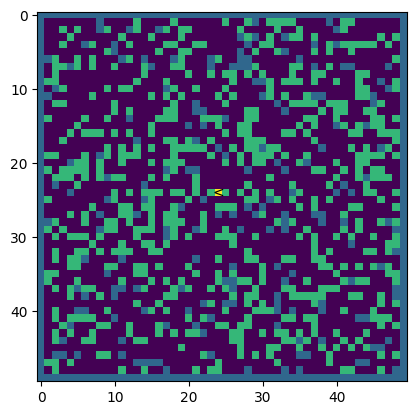

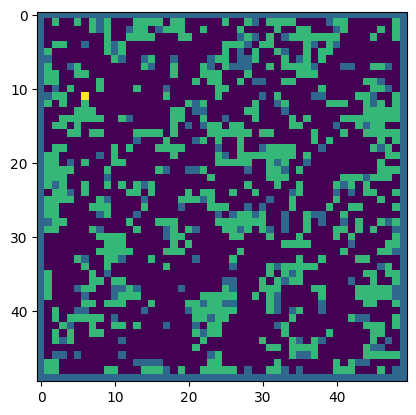

GPS: 1436690


In [141]:
floor = []
move_set = []

with open('input.txt') as f:
    is_map = True
    for line in f:
        if line.strip() == '':
            is_map = False
            continue
        if is_map:
            line = line.strip()
            floor.append([int_map[c] for c in line])
        else:
            # moves
            line = line.strip()
            move_set += [move_map[c] for c in line]

floor = np.array(floor, dtype=np.int8)
floor = Floor(floor)

robot_p = np.where(floor.floor == 3)
robot_p = (int(robot_p[0][0]), int(robot_p[1][0]))

robot = Robot(robot_p, move_set)

floor.graph(robot)

for _ in range(len(move_set)):
    floor.move(robot)

floor.graph(robot)

cum_sum = 0

# GPS (Good Positioning System)
for i in range(floor.floor.shape[0]):
    for j in range(floor.floor.shape[1]):
        if floor.floor[i][j] == int_map['O']:
            cum_sum += 100 * i + j

print(f'GPS: {cum_sum}')